# Diabetic Retinopathy Training

In [25]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Subset
import matplotlib.pyplot as plt
import numpy as np


In [26]:


dataset_path = 'aptos2019-kaggleDR-training-combined-resized-20240701T170442Z-001/aptos2019-kaggleDR-training-combined-resized'

#making sure the image size is consistent
mytransform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor()
])

#getting ImageFolder dataset for processing
dataset = datasets.ImageFolder(root=dataset_path, transform=mytransform)

#using dataloader for shuffling and batching dataset
testdataloader = DataLoader(dataset, batch_size=32, shuffle=True, num_workers=2)

print(len(testdataloader))
print(len(dataset.classes))



1213
5


## Printing Out to see some of the images

['0', '1', '2', '3', '4']
5
<class 'torch.utils.data.dataloader.DataLoader'>


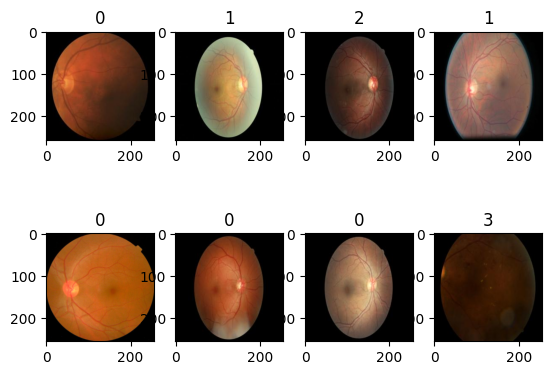

In [27]:

class_names = dataset.classes
print(class_names)
print(len(class_names))

#Getting batch one
data_iter = iter(testdataloader)
print(type(testdataloader))
images, labels = next(data_iter)

#Converting Images to numpy for plt plotting
def imshow(img):
    npimg = img.numpy()

    #Mathing dimensions of plt.imshow
    plt.imshow(npimg.transpose(1, 2, 0))

#Setting plt grid
#plt.figure(figsize=(12, 8))

#Plotting first 8 images in batch one
for i in range(8):
    plt.subplot(2, 4, i + 1)
    imshow(images[i])
    plt.title(class_names[labels[i]])
    #plt.axis('off')

plt.show()

## Setting up the loaders

In [28]:
#Hash Map to organize dataset clearly by labels -> will be used to evenly distribute into training, validation, and testing datasets
# Hash Map to organize dataset clearly by labels -> will be used to evenly distribute into training, validation, and testing datasets
classLabelToImageIndex = {}

print("Number of classes =", len(dataset.classes))
for label in range(len(dataset.classes)):
    classLabelToImageIndex[label] = []

print("Number of images =", len(dataset))

for i, (image, label) in enumerate(dataset):
    if i % 100 == 0:
        print(i)
    classLabelToImageIndex[label].append(i)

print("Classification complete")

Number of classes = 5
Number of images = 38788
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
177

# Distributing and Setting up the Sets of Data (training, validation, testing)

In [29]:
#Shuffling the indices
training_indices = []
validation_indices = []
testing_indices = []

for label, indices in classLabelToImageIndex.items():


    np.random.shuffle(indices) #shuffling images in each class
    imageCount = len(indices)

    #Splitting into training, validation, and testing indices for datasets
    trainAmt = int(imageCount/3)
    validationAmt = int(imageCount*2/3)
    training_indices.extend(indices[:trainAmt])
    validation_indices.extend(indices[trainAmt:validationAmt])
    testing_indices.extend(indices[validationAmt:])

print("Indices splitting complete")

#Creating new sub datasets for training, validation, and testing
training_datatset = Subset(dataset, training_indices)
validation_dataset = Subset(dataset, validation_indices)
testing_dataset = Subset(dataset, testing_indices)

print("Creating New datasets complete")

#Creating loaders
training_loader = DataLoader(training_datatset, batch_size=32, shuffle=True, num_workers=2)
validation_loader = DataLoader(validation_dataset, batch_size=32, shuffle=True, num_workers=2)
testing_loader = DataLoader(testing_dataset, batch_size=32, shuffle=False, num_workers=2)

print("Loading datasets complete")


#Verifying Distributions
def get_class_distribution(loader, dataset):
    class_counts = [0] * len(dataset.classes)
    for _, labels in loader:
        for label in labels:
            class_counts[label] += 1
    return class_counts

print("Train set class distribution:", get_class_distribution(training_loader, dataset))
print("Validation set class distribution:", get_class_distribution(validation_loader, dataset))
print("Test set class distribution:", get_class_distribution(testing_loader, dataset))


Indices splitting complete
Creating New datasets complete
Loading datasets complete
Train set class distribution: [9205, 937, 2097, 355, 334]
Validation set class distribution: [9205, 938, 2097, 355, 334]
Test set class distribution: [9205, 938, 2097, 356, 335]


## Again printing out some images

['0', '1', '2', '3', '4']
5
<class 'torch.utils.data.dataloader.DataLoader'>


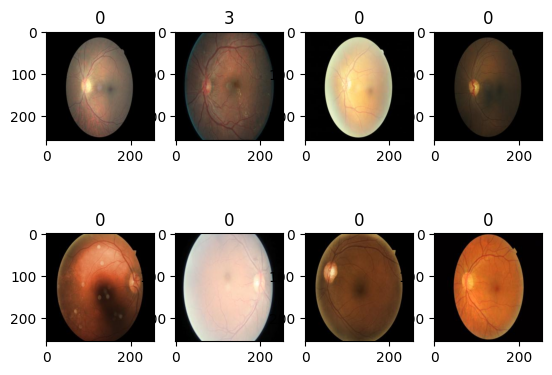

In [30]:

class_names = dataset.classes
print(class_names)
print(len(class_names))

#Getting batch one
data_iter = iter(training_loader)
print(type(training_loader))
images, labels = next(data_iter)

#Converting Images to numpy for plt plotting
def imshow(img):
    npimg = img.numpy()

    #Mathing dimensions of plt.imshow
    plt.imshow(npimg.transpose(1, 2, 0))

#Setting plt grid
#plt.figure(figsize=(12, 8))

#Plotting first 8 images in batch one
for i in range(8):
    plt.subplot(2, 4, i + 1)
    imshow(images[i])
    plt.title(class_names[labels[i]])
    #plt.axis('off')

plt.show()

# Classes Definition

In [31]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import os
import matplotlib.pyplot as plt

In [32]:


class DR_detection_neural_network(nn.Module):
    def __init__(self):
        super(DR_detection_neural_network, self).__init__()
        self.Conv1 = nn.Conv2d(3, 8, 3)
        self.Conv2 = nn.Conv2d(8, 16, 3)
        self.Conv3 = nn.Conv2d(16, 32, 3, stride=2)
        self.Conv4 = nn.Conv2d(32, 64, 3, stride=2)
        self.Conv5 = nn.Conv2d(64, 128, 3, stride=2)
        self.Conv6 = nn.Conv2d(128, 128, 3, stride=2)
        self.Dropout = nn.Dropout(p=0.1)
        
        conv_layers = [self.Conv1, self.Conv2, self.Conv3, self.Conv4, self.Conv5, self.Conv6]
        input_size = 256  # The input size (256x256)
        conv_output_size = calculate_conv_output_size(input_size, conv_layers)
        
        self.fc1 = nn.Linear(conv_output_size * conv_output_size * 128, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 5)

    def forward(self, x):
        x = F.relu(self.Conv1(x))
        x = F.relu(self.Conv2(x))
        x = F.relu(self.Conv3(x))
        x = F.relu(self.Conv4(x))
        x = F.relu(self.Conv5(x))
        x = F.relu(self.Conv6(x))
        x = x.view(x.size(0), -1)  # Flatten the output from the convolutional layers
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

def calculate_conv_output_size(input_size, layers):
    for layer in layers:
        if isinstance(layer, nn.Conv2d):
            input_size = (input_size - (layer.kernel_size[0] - 1) - 1) // layer.stride[0] + 1
    return input_size

def train_model(model, train_loader, val_loader, num_epochs=10, learning_rate=0.001, checkpoint_path='modelvalues.txt'):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    train_loader = train_loader
    val_loader = val_loader
    model.to(device)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    train_losses = []
    val_losses = []

    total_step = len(train_loader)
    for epoch in range(num_epochs):
        model.train()
        current_loss = 0.0
        for i, (images, labels) in enumerate(train_loader):
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            current_loss += loss.item()

        epoch_train_loss = current_loss / total_step
        train_losses.append(epoch_train_loss)

        model.eval()
        validation_loss = 0.0

        correct = 0
        total = 0
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            loss = criterion(outputs, labels)
            validation_loss += loss.item()

        epoch_validation_loss = validation_loss / len(val_loader)
        val_losses.append(epoch_validation_loss)

        val_accuracy = correct / total
        print(f'Validation Accuracy after epoch {epoch + 1}: {100 * val_accuracy:.2f}%')

    print('Training finished!')
    plt.figure()
    plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
    plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss Over Epochs')
    plt.legend()
    plt.show()

    # Save the model
    torch.save(model.state_dict(), checkpoint_path)
    print(f'Model saved to {checkpoint_path}')



Validation Accuracy after epoch 1: 100.00%
Training finished!


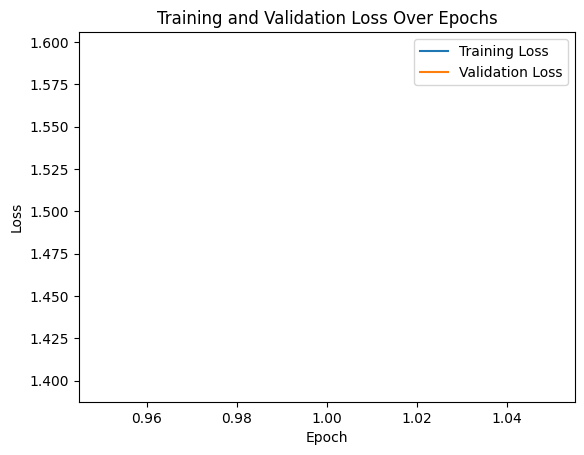

Model saved to modelvalues.txt


In [33]:
model = DR_detection_neural_network()

smallerDataset = Subset(dataset, range(128))  # Make sure to define `training_indices` or use `range(32)`
smallerDatasetLoader = DataLoader(smallerDataset, batch_size=128, shuffle=True, num_workers=4)

train_model(model, smallerDatasetLoader, smallerDatasetLoader, num_epochs=1, learning_rate=0.001)

Validation Accuracy after epoch 1: 71.20%
Validation Accuracy after epoch 2: 71.20%
Validation Accuracy after epoch 3: 71.20%
Validation Accuracy after epoch 4: 71.27%
Validation Accuracy after epoch 5: 72.84%
Validation Accuracy after epoch 6: 72.61%
Validation Accuracy after epoch 7: 72.85%
Validation Accuracy after epoch 8: 72.91%
Validation Accuracy after epoch 9: 72.99%
Validation Accuracy after epoch 10: 72.91%
Training finished!


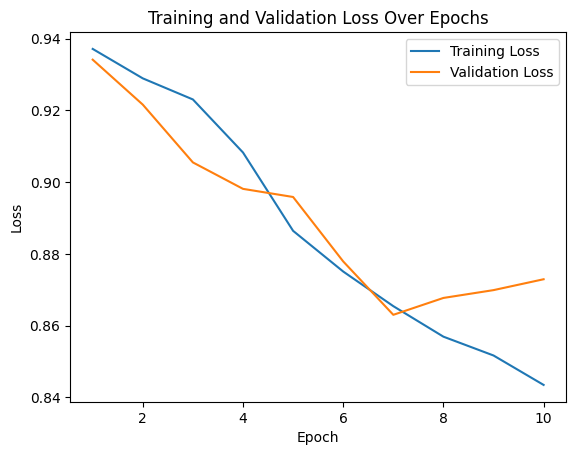

Model saved to model.pth


In [46]:
# Example usage:
againmodel1 = DR_detection_neural_network()

train_model(againmodel1, training_loader, validation_loader, num_epochs=10, learning_rate=0.001, checkpoint_path='model.pth')


Validation Accuracy after epoch 1: 71.20%
Validation Accuracy after epoch 2: 71.20%
Validation Accuracy after epoch 3: 71.20%
Validation Accuracy after epoch 4: 71.20%
Validation Accuracy after epoch 5: 71.20%
Validation Accuracy after epoch 6: 71.20%
Training finished!


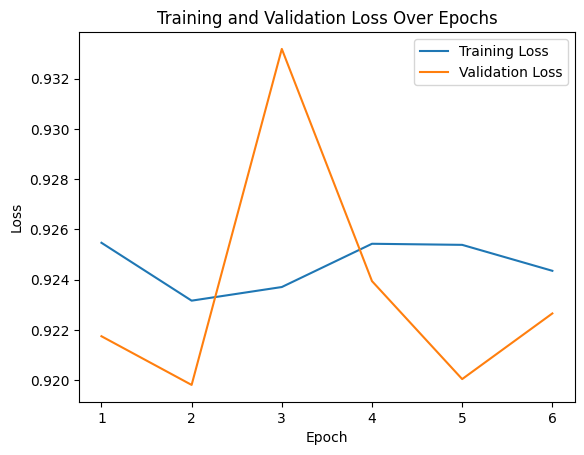

Model saved to model.pth


In [35]:
train_model(model1, training_loader, validation_loader, num_epochs=6, learning_rate=0.001, checkpoint_path='model.pth')

## Code to load the model, later
Just use model.eval() for inference
use model.train() for gradient computations


In [36]:

""" # Load the model later
model = DR_detection_neural_network()
model.load_state_dict(torch.load('model.pth'))
model.eval()  # Set the model to evaluation mode
print('Model loaded and ready for inference or further training.')
 """

" # Load the model later\nmodel = DR_detection_neural_network()\nmodel.load_state_dict(torch.load('model.pth'))\nmodel.eval()  # Set the model to evaluation mode\nprint('Model loaded and ready for inference or further training.')\n "

# Trying  Improved Model 

In [37]:

class ImprovedDRDetectionNN(nn.Module):
    def __init__(self):
        super(ImprovedDRDetectionNN, self).__init__()
        self.Conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.Conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.Conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.Conv4 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.Conv5 = nn.Conv2d(256, 512, kernel_size=3, padding=1)
        self.Conv6 = nn.Conv2d(512, 512, kernel_size=3, padding=1)

        self.BatchNorm1 = nn.BatchNorm2d(32)
        self.BatchNorm2 = nn.BatchNorm2d(64)
        self.BatchNorm3 = nn.BatchNorm2d(128)
        self.BatchNorm4 = nn.BatchNorm2d(256)
        self.BatchNorm5 = nn.BatchNorm2d(512)
        self.BatchNorm6 = nn.BatchNorm2d(512)

        self.MaxPool = nn.MaxPool2d(kernel_size=2, stride=2)

        self.Dropout = nn.Dropout(p=0.5)

        # Adding an adaptive pooling layer to ensure fixed output size
        self.AdaptivePool = nn.AdaptiveAvgPool2d((1, 1))

        self.fc1 = nn.Linear(512, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 5)

    def forward(self, x):
        x = self.MaxPool(F.relu(self.BatchNorm1(self.Conv1(x))))
        x = self.MaxPool(F.relu(self.BatchNorm2(self.Conv2(x))))
        x = self.MaxPool(F.relu(self.BatchNorm3(self.Conv3(x))))
        x = self.MaxPool(F.relu(self.BatchNorm4(self.Conv4(x))))
        x = self.MaxPool(F.relu(self.BatchNorm5(self.Conv5(x))))
        x = self.MaxPool(F.relu(self.BatchNorm6(self.Conv6(x))))

        x = self.AdaptivePool(x)
        x = x.view(x.size(0), -1)  # Flatten the output from the convolutional layers
        x = F.relu(self.fc1(x))
        x = self.Dropout(x)
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

def calculate_conv_output_size2(input_size, layers):
    for layer in layers:
        if isinstance(layer, nn.Conv2d):
            input_size = (input_size - (layer.kernel_size[0] - 1) - 1) // layer.stride[0] + 1
        elif isinstance(layer, nn.MaxPool2d):
            input_size = (input_size - (layer.kernel_size - 1) - 1) // layer.stride + 1
    return input_size




Validation Accuracy after epoch 1: 71.20%
Validation Accuracy after epoch 2: 71.20%
Validation Accuracy after epoch 3: 71.20%
Validation Accuracy after epoch 4: 72.70%
Validation Accuracy after epoch 5: 72.72%
Validation Accuracy after epoch 6: 72.84%
Validation Accuracy after epoch 7: 73.00%
Validation Accuracy after epoch 8: 72.80%
Validation Accuracy after epoch 9: 72.98%
Validation Accuracy after epoch 10: 73.06%
Validation Accuracy after epoch 11: 73.09%
Validation Accuracy after epoch 12: 72.83%
Validation Accuracy after epoch 13: 73.12%
Validation Accuracy after epoch 14: 73.11%
Validation Accuracy after epoch 15: 73.18%
Validation Accuracy after epoch 16: 72.87%
Validation Accuracy after epoch 17: 73.02%
Validation Accuracy after epoch 18: 73.15%
Validation Accuracy after epoch 19: 73.08%
Validation Accuracy after epoch 20: 73.10%
Training finished!


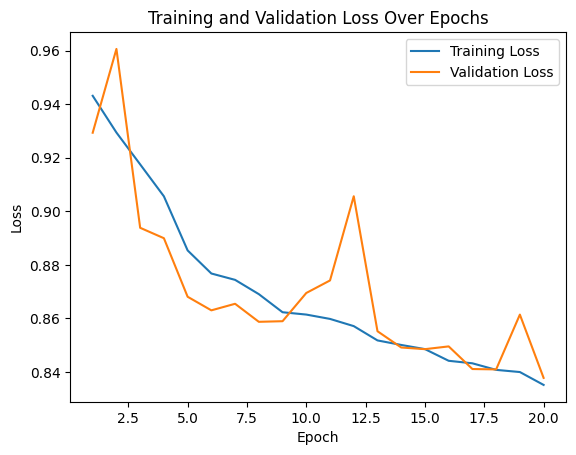

Model saved to improved_model.pth


In [38]:
improvedmodel = ImprovedDRDetectionNN()
train_model(improvedmodel, training_loader, validation_loader, num_epochs=20, learning_rate=0.001, checkpoint_path='improved_model.pth')


Validation Accuracy after epoch 1: 73.23%
Validation Accuracy after epoch 2: 73.15%
Validation Accuracy after epoch 3: 73.14%
Validation Accuracy after epoch 4: 73.10%
Validation Accuracy after epoch 5: 72.98%
Validation Accuracy after epoch 6: 73.08%
Validation Accuracy after epoch 7: 73.18%
Validation Accuracy after epoch 8: 73.20%
Validation Accuracy after epoch 9: 72.90%
Validation Accuracy after epoch 10: 73.25%
Training finished!


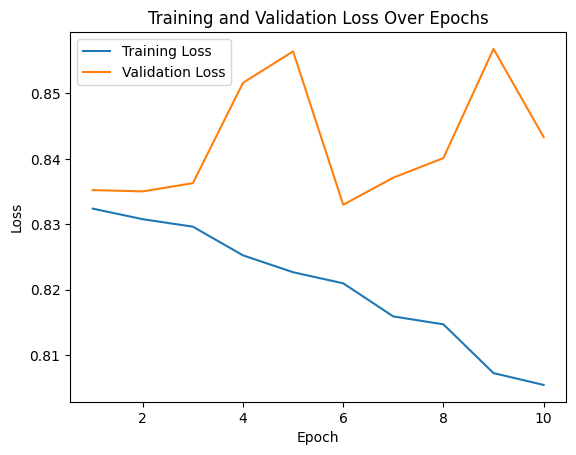

Model saved to improved_model2.pth


In [39]:
train_model(improvedmodel, training_loader, validation_loader, num_epochs=10, learning_rate=0.001, checkpoint_path='improved_model2.pth')

In [44]:
import numpy as np
import seaborn as sns
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix

def evaluate_model(model, test_loader, checkpoint_path='model.pth'):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.load_state_dict(torch.load(checkpoint_path))
    model.to(device)
    model.eval()
    
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    all_preds = np.array(all_preds)
    all_labels = np.array(all_labels)

    precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average='weighted')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')

    # Confusion Matrix
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No DR', 'Mild', 'Moderate', 'Severe', 'Proliferative DR'], yticklabels=['No DR', 'Mild', 'Moderate', 'Severe', 'Proliferative DR'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()


c:\Users\abdul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Precision: 0.6439
Recall: 0.7325
F1 Score: 0.6448


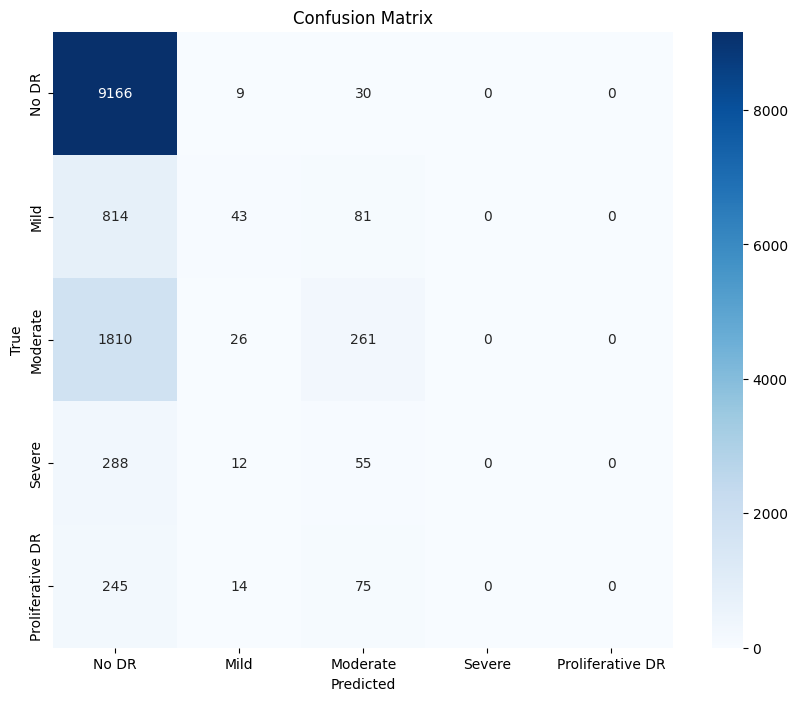

In [45]:

evaluate_model(improvedmodel, validation_loader, checkpoint_path='improved_model2.pth')


c:\Users\abdul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Precision: 0.6359
Recall: 0.7291
F1 Score: 0.6348


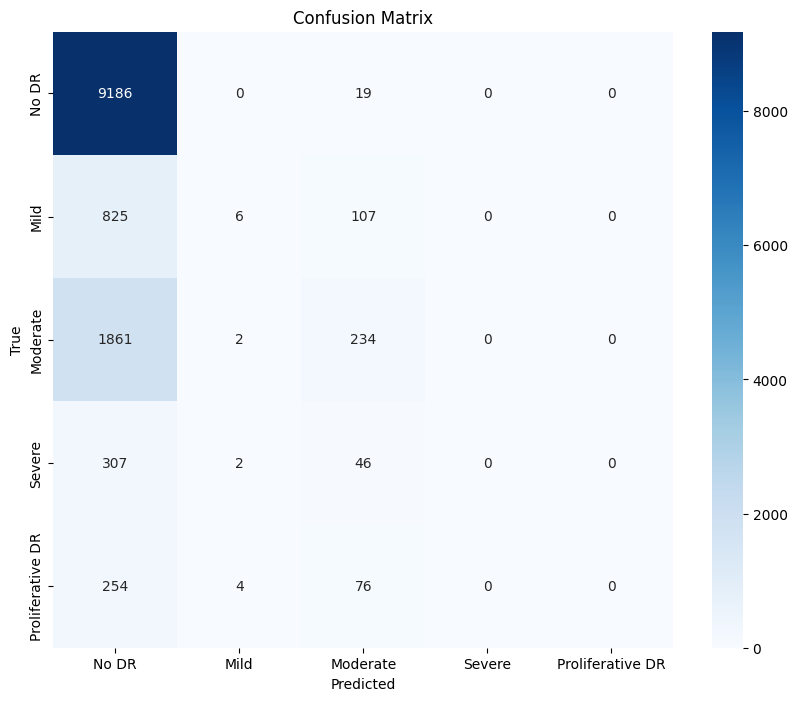

In [47]:
evaluate_model(againmodel1, validation_loader, checkpoint_path='model.pth')

# Original Results and Model

Validation Accuracy after epoch 1: 71.20%
Validation Accuracy after epoch 2: 71.20%
Validation Accuracy after epoch 3: 72.40%
Validation Accuracy after epoch 4: 72.85%
Validation Accuracy after epoch 5: 73.44%
Validation Accuracy after epoch 6: 73.42%
Validation Accuracy after epoch 7: 73.35%
Validation Accuracy after epoch 8: 73.46%
Validation Accuracy after epoch 9: 73.27%
Validation Accuracy after epoch 10: 73.21%
Validation Accuracy after epoch 11: 73.22%
Validation Accuracy after epoch 12: 73.39%
Validation Accuracy after epoch 13: 73.41%
Validation Accuracy after epoch 14: 73.25%
Validation Accuracy after epoch 15: 73.10%
Training finished!


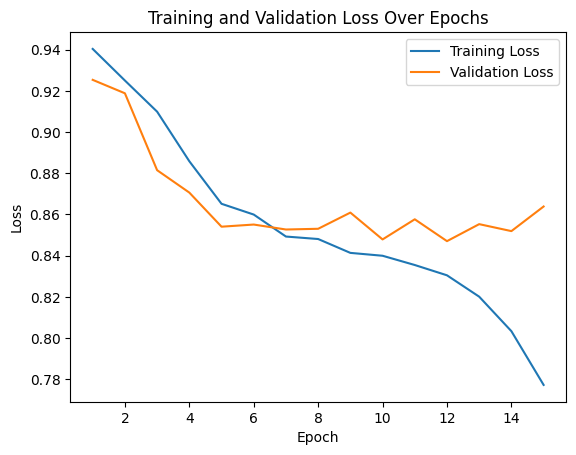

In [ ]:

model = DR_detection_neural_network()

#smallerDataset = Subset(dataset, range(32))  # Make sure to define `training_indices` or use `range(32)`
#smallerDatasetLoader = DataLoader(smallerDataset, batch_size=32, shuffle=True, num_workers=6)

train_model(model, training_loader, validation_loader, num_epochs=15, learning_rate=0.001)
